# 0. 환경 세팅

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import sys
from IPython.display import Image
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
import tensorflow as tf
import tensorflow_datasets as tfds
warnings.filterwarnings("ignore")

In [3]:
os.chdir('/content/drive/My Drive/프로젝트/데이콘-직업/data')

# 1. 데이터 불러오기

In [4]:
know_2018=pd.read_csv('./train/KNOW_2018.csv',na_values=' ')
know_2018.head()

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,cq10,cq11,cq12,cq13,cq14,cq15,cq16,cq17,cq18,cq19,cq20,cq21,cq22,cq23,cq24,cq25,cq26,cq27,cq28,cq29,cq30,cq31,cq32,cq33,cq34,cq35,cq36,cq37,cq38,cq39,...,bq233,bq234,bq235,bq241,bq242,bq243,bq244,bq245,bq25,bq25_1,bq26_1,bq26_1a,bq26_2,bq26_2a,bq26_3,bq26_3a,bq26_4,bq26_4a,bq27,bq28,bq28_1,bq29,bq30,bq31,bq32,bq33,bq34,bq35,bq36,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode
0,9486,5,3,4,2,2,5,4,5,4,4,4,3,3,4,1,5,3,4.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,4.0,2.0,1.0,1.0,2.0,4.0,3.0,4.0,4.0,3.0,4.0,...,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,4,정교한 직업 요구의 증가,치기공사,치카공,NaN,교정전문가,NaN,3,1,27,3,치기공과,1.0,1.0,NaN,1.0,42,3800.0,3400.0,NaN,306301
1,9487,4,3,4,4,4,4,4,4,4,3,3,3,3,4,3,2,2,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,2.0,1.0,1.0,3.0,1.0,3.0,3.0,3.0,3.0,...,0.0,0.0,NaN,NaN,NaN,3.0,NaN,NaN,1.0,2.0,3.0,NaN,3.0,NaN,3.0,NaN,3.0,NaN,1.0,2,게임 산업의 축소로 인해,없다,"서브라임텍스트, 유니티, 리눅스",정보보호컨설턴트,일반 프로그래머,없다,3,1,28,2,이과,1.0,2.0,NaN,1.0,40,2300.0,1800.0,NaN,133204
2,9488,4,1,5,3,3,4,2,4,1,2,1,2,2,2,2,1,1,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,4.0,1.0,4.0,3.0,3.0,1.0,4.0,4.0,5.0,4.0,...,0.0,0.0,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2,대형화 되는 추세,사장님,망치 실리콘 사다리 유리칼,회사원,NaN,NaN,4,1,59,2,기계과,2.0,NaN,6.0,NaN,30,NaN,NaN,3000.0,702502
3,9489,4,3,4,4,4,3,3,2,3,3,2,3,3,4,4,3,3,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,4.0,4.0,3.0,4.0,3.0,3.0,...,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,3,"과학이 발달할수록 실험,검사,분석 보조가 필요하므로",NaN,전자현미경 컴퓨터,NaN,NaN,NaN,2,1,38,4,물리 과학,1.0,1.0,NaN,1.0,40,3350.0,2750.0,NaN,121201
4,9490,3,2,3,1,1,4,3,4,3,2,3,1,1,5,2,3,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,3.0,4.0,4.0,3.0,1.0,1.0,1.0,1.0,...,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,4,고령화로인하여 틀니 및 인플란트등 의료보험 보장범위가 확대되어서,NaN,"니켈, 크롬, 코발트",판매업,NaN,NaN,4,2,27,4,치기공학,1.0,1.0,NaN,1.0,40,2500.0,2300.0,NaN,306301


In [5]:
know_2018_test=pd.read_csv('./test/KNOW_2018_test.csv',na_values=' ')
know_2018_test

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,cq10,cq11,cq12,cq13,cq14,cq15,cq16,cq17,cq18,cq19,cq20,cq21,cq22,cq23,cq24,cq25,cq26,cq27,cq28,cq29,cq30,cq31,cq32,cq33,cq34,cq35,cq36,cq37,cq38,cq39,...,bq232,bq233,bq234,bq235,bq241,bq242,bq243,bq244,bq245,bq25,bq25_1,bq26_1,bq26_1a,bq26_2,bq26_2a,bq26_3,bq26_3a,bq26_4,bq26_4a,bq27,bq28,bq28_1,bq29,bq30,bq31,bq32,bq33,bq34,bq35,bq36,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3
0,9486,4,1,3,1,1,3,2,3,1,1,1,1,2,1,5,1,3.0,1,4.0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,4,4.0,1.0,1.0,5.0,5.0,5,4.0,4.0,4.0,1.0,1.0,4.0,...,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,1,힘든직업이라 일할사람 없음,NaN,"잠수복, 망태",NaN,NaN,NaN,4.0,2,60.0,1,NaN,2.0,NaN,6.0,NaN,35.0,NaN,NaN,2000.0
1,9487,5,4,5,5,5,5,3,3,3,1,2,3,3,5,2,1,4.0,4,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,1.0,5.0,1.0,1.0,1.0,1,5.0,1.0,3.0,4.0,3.0,3.0,...,0.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,3.0,NaN,1.0,2,"인공지능의 발달, 플랫폼화 되어가는 웹, 쉬워지는 그래픽 프로그램으로 인해서 비전...","디자이너님, 등",웹코딩 프로그램(노트패드)_그래픽툴(포토샵/일러스트레이터/인디자인/어도비 XD/스케...,NaN,같은 범주 안에 있는 직업.,"단순 그래픽을 디자인 하는 것이 아니라, 큰 틀을 디자인하는 UX 디자인이 대세인듯...",2.0,2,26.0,4,커뮤니케이션 디자인 전공,1.0,1.0,NaN,1.0,65.0,2700.0,2200.0,NaN
2,9488,3,3,3,4,3,3,4,4,2,1,1,2,2,5,1,1,2.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,5.0,1.0,1.0,4.0,3,5.0,1.0,3.0,3.0,2.0,4.0,...,0.0,0.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,3,영화시장의 변화가 클 것 같지 않아서,없음,시나리오 작가 - 한글과 컴퓨터,"카피라이터, 문화기획자",드라마 작가,없음,3.0,2,46.0,4,국문학과,2.0,NaN,6.0,NaN,60.0,NaN,NaN,3200.0
3,9489,4,4,4,4,2,3,3,4,4,1,3,3,3,5,4,2,2.0,3,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1,1.0,5.0,1.0,2.0,2.0,2,5.0,1.0,2.0,3.0,3.0,3.0,...,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,3,"10년 전에도 그러하였고, 4차산업 영향이 더디게 올 가능성이 있는 분야이기에",없음,HWP,없음,잡지사 편집 기획,없음,3.0,2,35.0,3,극작학과,2.0,NaN,6.0,NaN,20.0,NaN,NaN,2000.0
4,9490,5,2,3,2,4,4,4,4,3,1,3,2,2,5,1,1,1.0,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,5.0,1.0,1.0,3.0,1,4.0,1.0,4.0,4.0,4.0,3.0,...,0.0,3.0,0.0,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,3,지금도 많이 배출되어서,NaN,속기록,NaN,NaN,NaN,2.0,2,32.0,2,실업,1.0,4.0,NaN,2.0,35.0,3000.0,1500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9064,18564,5,4,2,2,2,4,4,3,3,4,4,3,1,5,1,1,4.0,4,5.0,4.0,5.0,5.0,1.0,4.0,1.0,4.0,4,5.0,2.0,4.0,2.0,3.0,5,5.0,5.0,5.0,4.0,4.0,2.0,...,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,5.0,2.0,NaN,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,4,음식문화도 서구화가 되어가기 때문에,없음,"칼, 도마, 위생복, 거품기",없음,NaN,NaN,4.0,2,38.0,4,호텔조리학,2.0,NaN,5.0,NaN,72.0,NaN,NaN,8000.0
9065,18565,2,2,5,5,5,4,4,4,4,4,4,2,2,5,1,1,4.0,5,2.0,1.0,5.0,1.0,1.0,5.0,1.0,5.0,1,2.0,2.0,4.0,2.0,1.0,1,5.0,5.0,4.0,4.0,3.0,2.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,4,사람들이 많은 괌심을 가지고 있으므로(향후 먹거리나 식량문제),없음,분석프로그램,식품회사 식품분석원,없음,없음,1.0,2,50.0,5,식품공학,1.0,1.0,NaN,1.0,40.0,3000.0,2100.0,NaN
9066,18566,4,4,3,2,2,3,4,4,4,3,1,3,3,4,3,3,4.0,1,1.0,1.0,3.0,1.0,1.0,3.0,1.0,3.0,1,1.0,3.0,3.0,2.0,2.0,3,3.0,4.0,2.0,3.0,3.0,2.0,...,0.0,0.0,0.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,4,턱없이 부족함,지도사,"실험도구, 비커, 스포이드, 측정기계",서비스직,모름,모름,3.0,1,42.0,4,환경공학,1.0,2.0,NaN,2.0,40.0,1800.0,1800.0,NaN
9067,18567,4,2,5,5,5,5,3,4,3,2,2,5,4,5,4,3,3.0,3,4.0,2.0,5.0,2.0,2.0,5.0,1.0,5.0,2,3.0,3.0,3.0,2.0,3.0,2,3.0,5.0,3.0,4.0,4.0,2.0,...,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,3.0,NaN,2.0,4,과학이 발전할수록 실험 필요,없음,"원심분리기, HPLC",없음,없음,없음,2.0,1,38.0,5,식품공학,1.0,1.0,NaN,1.0,52.0,3500.0,2800.0,NaN


# 2. EDA

## 데이터 type 분포

In [6]:
print('학습용 데이터 type 분포')
know_2018[know_2018.columns[1:]].dtypes.value_counts()

학습용 데이터 type 분포


float64    103
object      19
int64       18
dtype: int64

In [7]:
print('평가용 데이터 type 분포')
know_2018_test[know_2018_test.columns[1:]].dtypes.value_counts() #label 컬럼이 하나 없다.

평가용 데이터 type 분포


float64    98
int64      25
object     16
dtype: int64

## Target Column - knowcode 파악

In [8]:
print("데이터 target column(상위 5개) 분포")
print(know_2018['knowcode'].value_counts()[:5])

데이터 target column(상위 5개) 분포
13305     45
622304    45
415404    45
22103     31
301004    31
Name: knowcode, dtype: int64


13305 : 경찰·소방·교도 관리자

622304 : 화물차・특수차 운전원

415404 : 시각디자이너

22103 : 경영 진단 전문가

301004 : 간호사

In [9]:
job_top5=['13305','622304','415404','22103','301004']

Text(0, 0.5, 'Count')

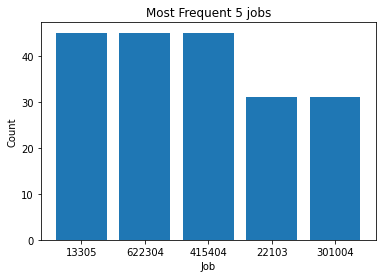

In [10]:
plt.bar(job_top5,know_2018['knowcode'].value_counts()[:5])
plt.title('Most Frequent 5 jobs')
plt.xlabel('Job')
plt.ylabel('Count')

In [11]:
print("데이터 target column(하위 5개) 분포")
print(know_2018['knowcode'].value_counts()[-5:])

데이터 target column(하위 5개) 분포
852301    15
813101    15
411105    14
133901    13
155101    10
Name: knowcode, dtype: int64


852301 : 화학제품생산기조작원

813101 : 금형원

411105 : 게임시나리오작가

133901 : IT 테스터 및 IT QA 전문가

155101 : 태양열연구및개발자

In [12]:
job_low5=['852301','813101','411105','133901','155101']

Text(0, 0.5, 'Count')

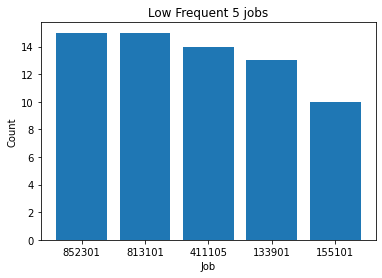

In [13]:
plt.bar(job_low5,know_2018['knowcode'].value_counts()[-5:])
plt.title('Low Frequent 5 jobs')
plt.xlabel('Job')
plt.ylabel('Count')

## cq 간 상관관계

In [14]:
columns=know_2018.columns[1:-1][:57]
columns

Index(['cq1', 'cq2', 'cq3', 'cq4', 'cq5', 'cq6', 'cq7', 'cq8', 'cq9', 'cq10',
       'cq11', 'cq12', 'cq13', 'cq14', 'cq15', 'cq16', 'cq17', 'cq18', 'cq19',
       'cq20', 'cq21', 'cq22', 'cq23', 'cq24', 'cq25', 'cq26', 'cq27', 'cq28',
       'cq29', 'cq30', 'cq31', 'cq32', 'cq33', 'cq34', 'cq35', 'cq36', 'cq37',
       'cq38', 'cq39', 'cq40', 'cq41', 'cq42', 'cq43', 'cq44', 'cq45', 'cq46',
       'cq47', 'cq48', 'cq49', 'cq50_1', 'cq50_2', 'cq50_3', 'cq50_4',
       'cq50_5', 'cq50_6', 'cq50_7', 'cq50_8'],
      dtype='object')

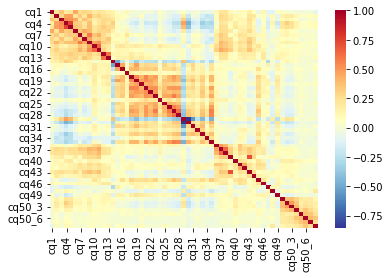

In [15]:
sns.heatmap(know_2018[columns].corr(),cmap = plt.cm.RdYlBu_r, annot=False)

## 산업 유형 (bq1)

In [16]:
know_2018['bq1'].value_counts()

3.0     1512
13.0    1017
18.0     807
17.0     733
10.0     686
15.0     620
6.0      605
19.0     523
16.0     506
7.0      412
8.0      410
11.0     327
9.0      198
4.0      192
14.0     173
1.0      172
5.0       57
20.0      51
2.0       38
12.0      32
21.0       1
Name: bq1, dtype: int64

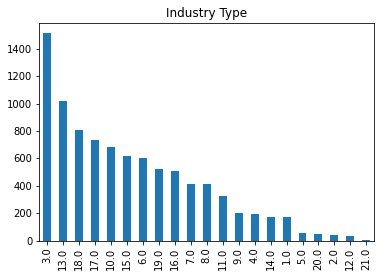

In [17]:
know_2018['bq1'].value_counts().plot.bar(title='Industry Type')

산업 유형이 3인 사람들의 직업 코드의 분포를 보겠다.

In [18]:
know_2018[know_2018['bq1']==3]['knowcode'].value_counts()[:10]

816103    30
835201    18
861301    18
415404    17
306301    16
826301    16
861201    15
822301    15
826401    15
863301    15
Name: knowcode, dtype: int64

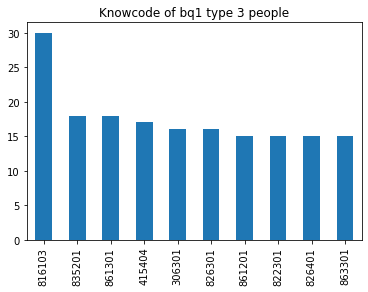

In [19]:
know_2018[know_2018['bq1']==3]['knowcode'].value_counts()[:10].plot.bar(title='Knowcode of bq1 type 3 people')

산업 유형이 18인 사람들의 직업 코드의 분포를 보겠다.

In [20]:
know_2018[know_2018['bq1']==18]['knowcode'].value_counts()[:10]

521304    30
24402     29
24404     20
414701    16
420902    16
420301    16
14103     16
416201    16
414901    15
414501    15
Name: knowcode, dtype: int64

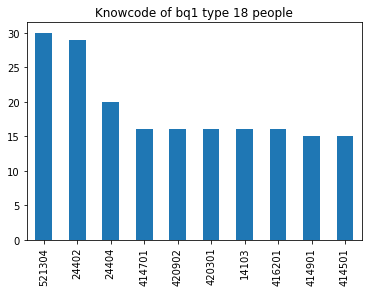

In [21]:
know_2018[know_2018['bq1']==18]['knowcode'].value_counts()[:10].plot.bar(title='Knowcode of bq1 type 18 people')

산업 유형이 13인 사람들의 직업 코드의 분포를 보겠다.

In [22]:
know_2018[know_2018['bq1']==13]['knowcode'].value_counts()[:10]

24203     29
29303     25
155105    20
22103     18
151108    17
155203    16
121105    16
221401    15
415404    15
121201    15
Name: knowcode, dtype: int64

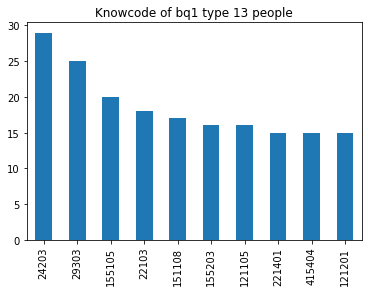

In [23]:
know_2018[know_2018['bq1']==13]['knowcode'].value_counts()[:10].plot.bar(title='Knowcode of bq1 type 13 people')

bq1의 유형과 직업코드를 비교하여 보았을 때 꽤 큰 관련이 있고 knowcode 예측에 중요한 변수로 작용할 것이라고 추측할 수 있다.

type 3인 경우엔 86으로 시작하는 직업 코드가 많았고

type 18인 경우엔 41,

type 13인 경우엔 15로 시작하는 직업 코드가 많았다.

## 근무업체 유형(bq2)

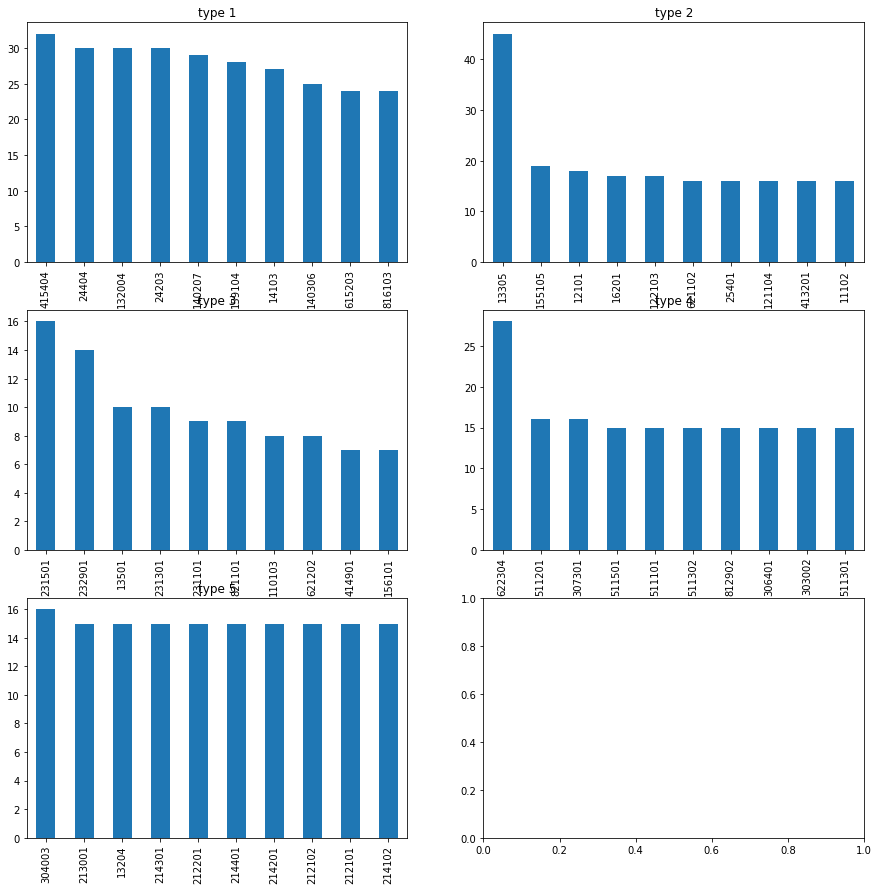

In [24]:
f, ax = plt.subplots(3,2, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/2)
  col=i%2
  know_2018[know_2018['bq2']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

근무업체 유형에 따라서도 knowcode의 경향은 많이 달라지는 걸 확인할 수 있다.

## 근무업체 규모(bq3)

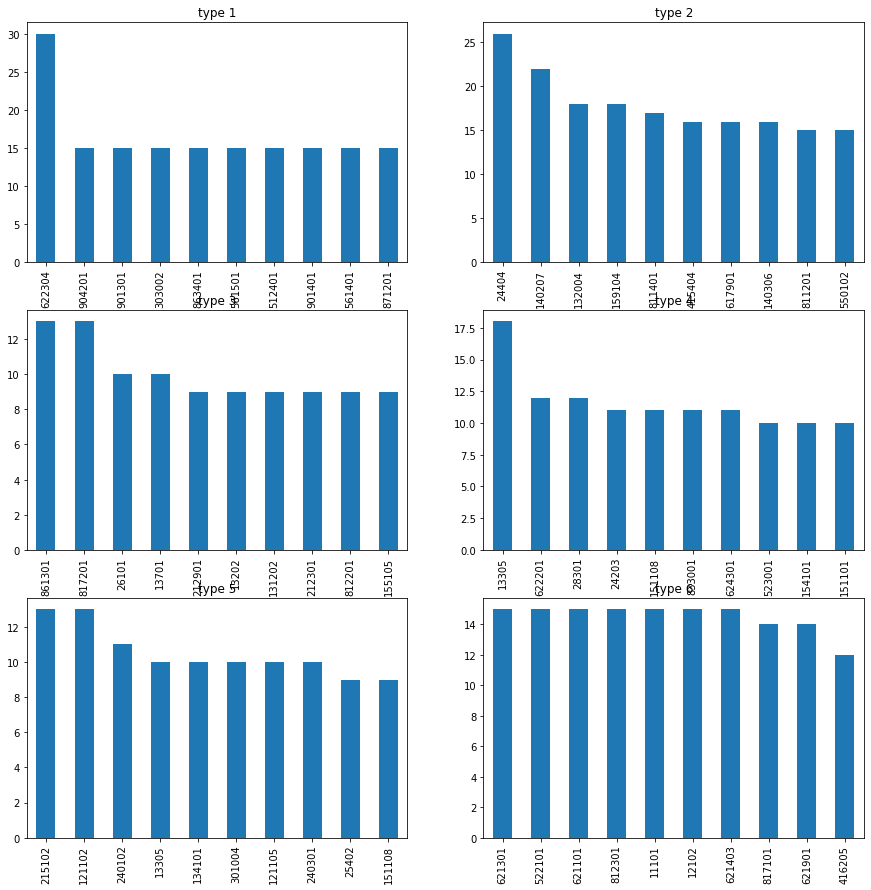

In [25]:
f, ax = plt.subplots(3,2, figsize=(15,15))

for i,j in enumerate(range(1,7)):
  row=int(i/2)
  col=i%2
  know_2018[know_2018['bq3']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

근무업체 규모에 따라서는 공통적으로 많이 존재하는 knowcode가 주로 등장하고 선택한 선지에 따라서는 크게 차이가 없어 보인다.

## 요구훈련 기간(bq5_1)

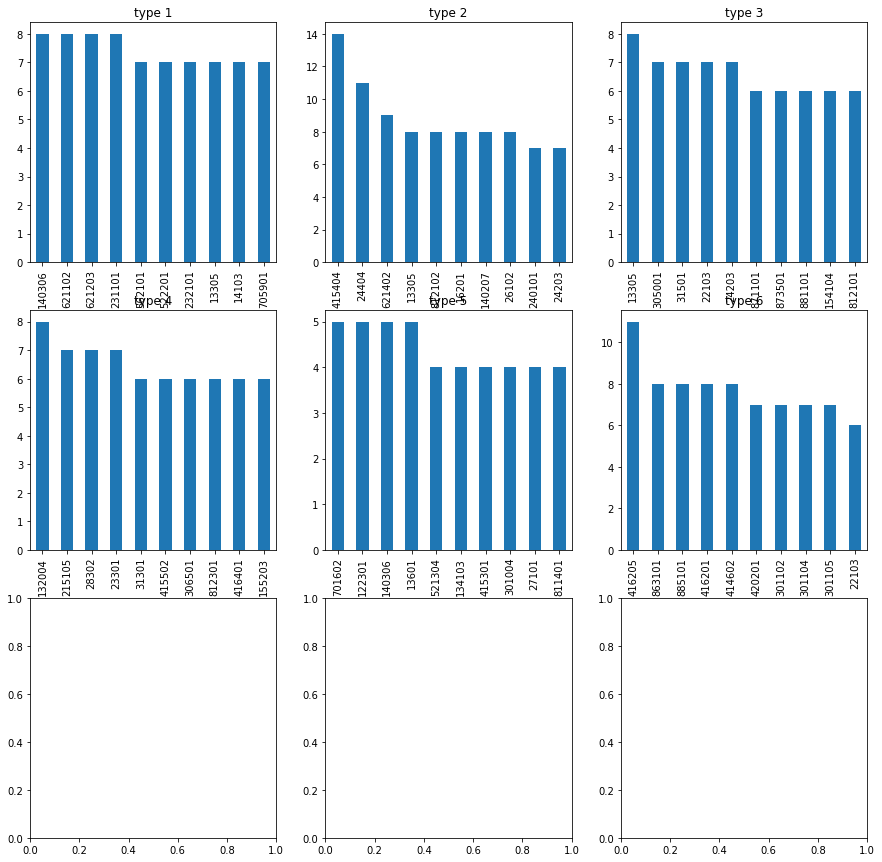

In [26]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,7)):
  row=int(i/3)
  col=i%3
  know_2018[know_2018['bq5_1']==str(j)]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

요구 훈련기간 따라서는 유의미한 분류를 할 수 있을 것으로 보인다.

bq5_1에 object 성격의 데이터가 들어있을 것 같으므로 처리해줘야 한다.

## 교육수준 (bq 7)

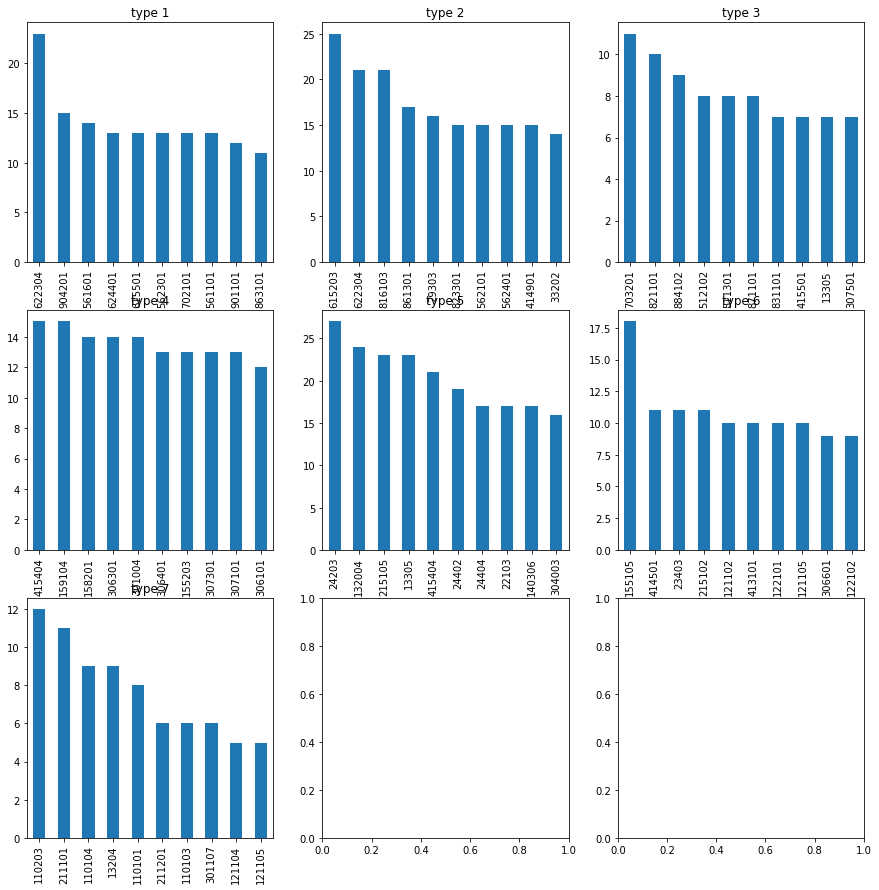

In [27]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,8)):
  row=int(i/3)
  col=i%3
  know_2018[know_2018['bq7']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 직업 안정성(bq 9) 

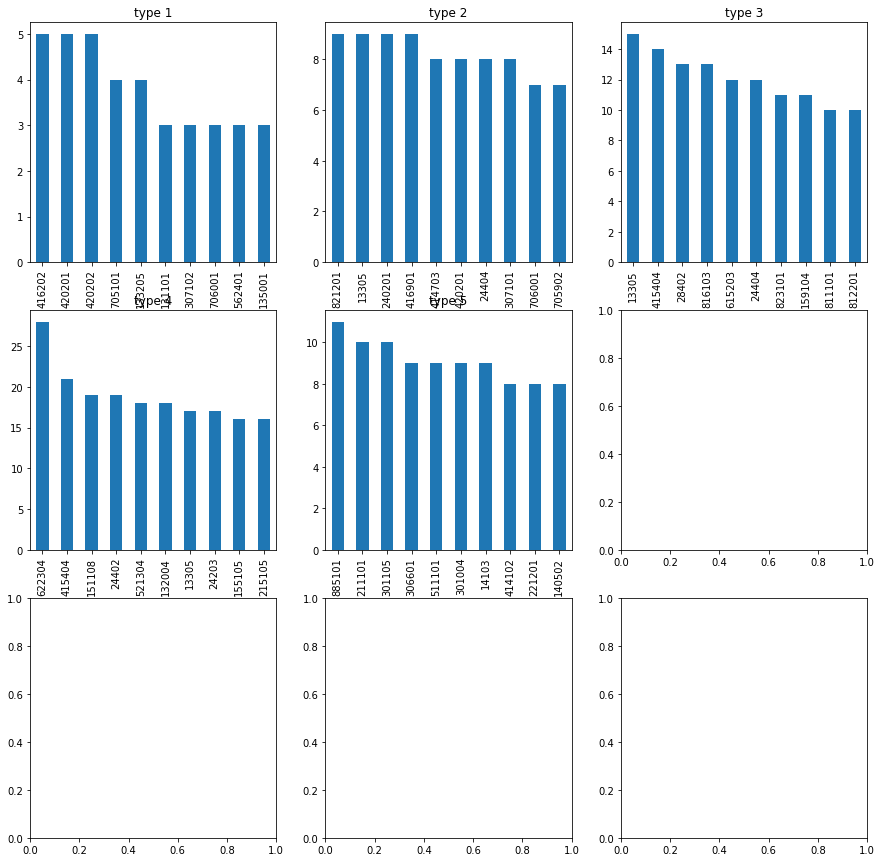

In [28]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/3)
  col=i%3
  know_2018[know_2018['bq9']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 근무조건 (bq 11)

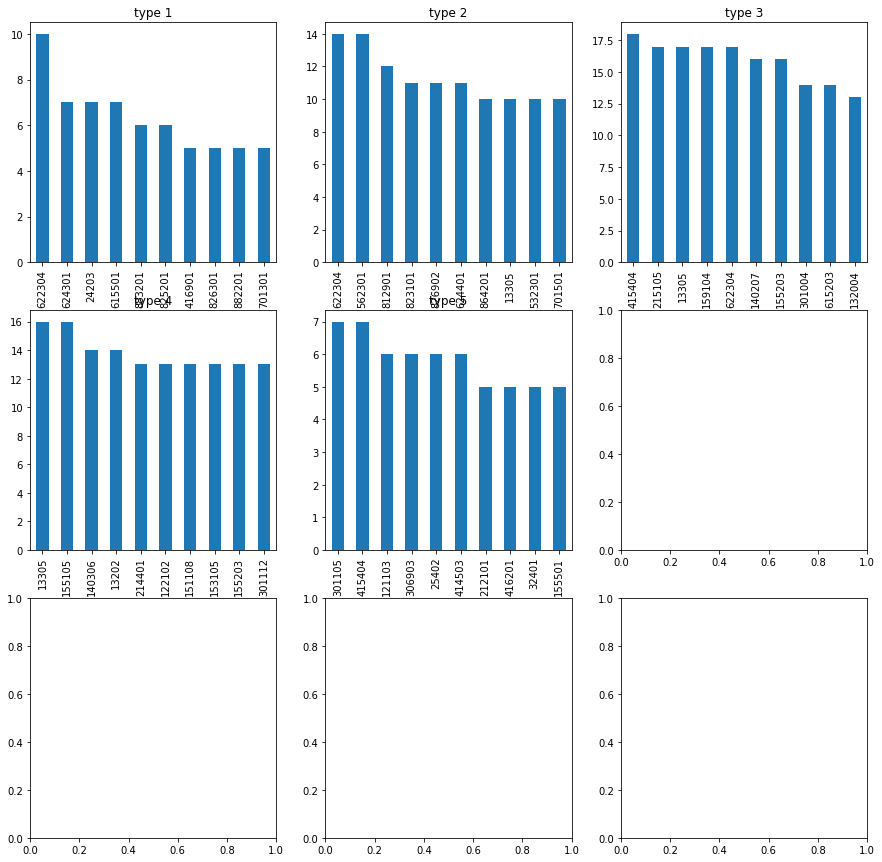

In [29]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/3)
  col=i%3
  know_2018[know_2018['bq11']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 보수 노무 대가성(bq 20)

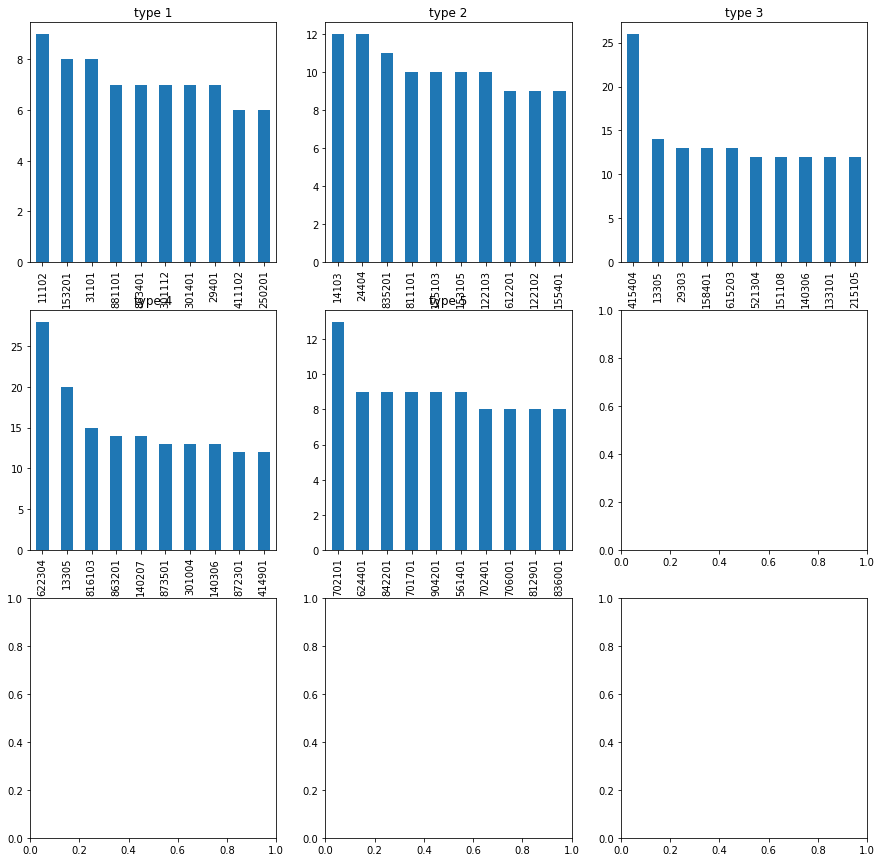

In [30]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/3)
  col=i%3
  know_2018[know_2018['bq20']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 최종학력(bq 37)

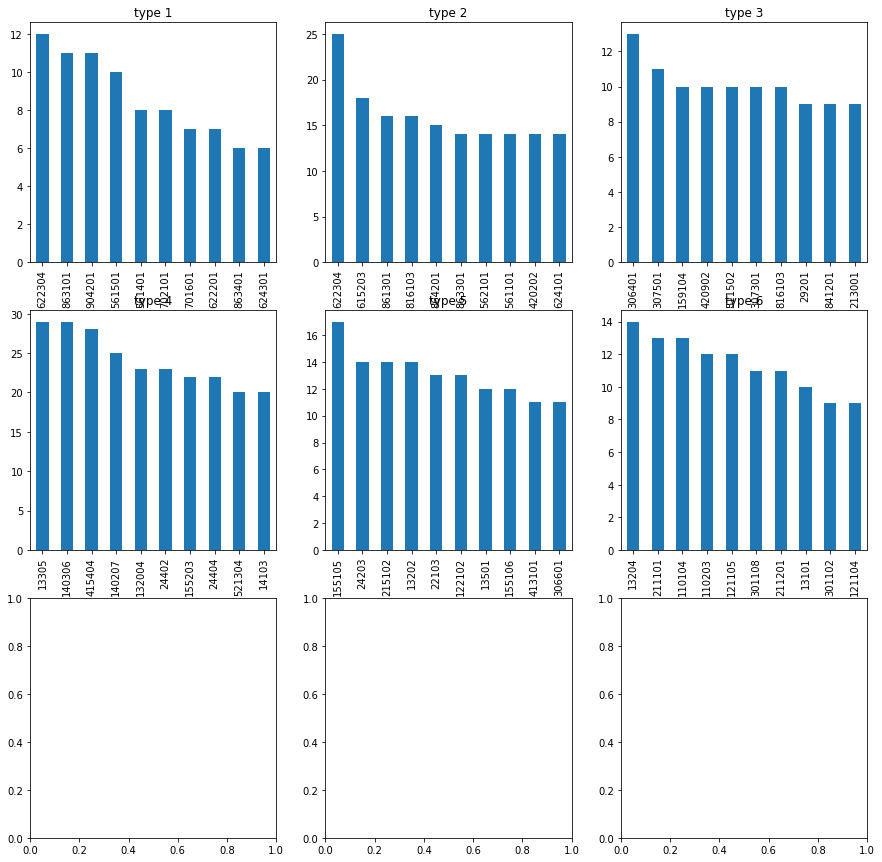

In [31]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,7)):
  row=int(i/3)
  col=i%3
  know_2018[know_2018['bq37']==str(j)]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 계약형태 (bq 39)

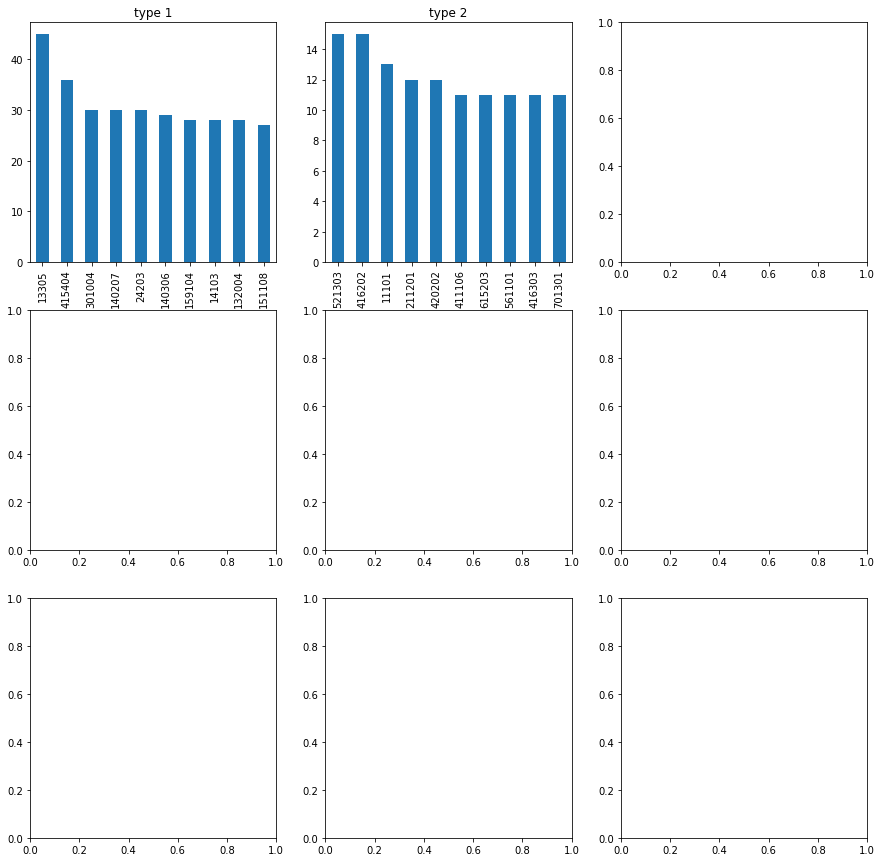

In [32]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,3)):
  row=int(i/3)
  col=i%3
  know_2018[know_2018['bq39']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

# 3. 데이터 전처리

## 3.1 결측치 파악

In [33]:
for index, value, tindex, tvalue in zip(know_2018.isnull().sum().index, know_2018.isnull().sum(), know_2018_test.isnull().sum().index, know_2018_test.isnull().sum()):
    print(f"{index} : {value} / {tindex} : {tvalue} / {value + tvalue}")

idx : 0 / idx : 0 / 0
cq1 : 0 / cq1 : 0 / 0
cq2 : 0 / cq2 : 0 / 0
cq3 : 0 / cq3 : 0 / 0
cq4 : 0 / cq4 : 0 / 0
cq5 : 0 / cq5 : 0 / 0
cq6 : 0 / cq6 : 0 / 0
cq7 : 0 / cq7 : 0 / 0
cq8 : 0 / cq8 : 0 / 0
cq9 : 0 / cq9 : 0 / 0
cq10 : 0 / cq10 : 0 / 0
cq11 : 0 / cq11 : 0 / 0
cq12 : 0 / cq12 : 0 / 0
cq13 : 0 / cq13 : 0 / 0
cq14 : 0 / cq14 : 0 / 0
cq15 : 0 / cq15 : 0 / 0
cq16 : 0 / cq16 : 0 / 0
cq17 : 0 / cq17 : 0 / 0
cq18 : 0 / cq18 : 0 / 0
cq19 : 0 / cq19 : 0 / 0
cq20 : 0 / cq20 : 0 / 0
cq21 : 0 / cq21 : 0 / 0
cq22 : 0 / cq22 : 0 / 0
cq23 : 0 / cq23 : 0 / 0
cq24 : 0 / cq24 : 0 / 0
cq25 : 0 / cq25 : 0 / 0
cq26 : 0 / cq26 : 0 / 0
cq27 : 0 / cq27 : 0 / 0
cq28 : 0 / cq28 : 0 / 0
cq29 : 0 / cq29 : 0 / 0
cq30 : 0 / cq30 : 0 / 0
cq31 : 0 / cq31 : 0 / 0
cq32 : 0 / cq32 : 0 / 0
cq33 : 0 / cq33 : 0 / 0
cq34 : 0 / cq34 : 0 / 0
cq35 : 0 / cq35 : 0 / 0
cq36 : 0 / cq36 : 0 / 0
cq37 : 0 / cq37 : 0 / 0
cq38 : 0 / cq38 : 0 / 0
cq39 : 0 / cq39 : 0 / 0
cq40 : 0 / cq40 : 0 / 0
cq41 : 0 / cq41 : 0 / 0
cq42 : 0 / c

## 3.2 결측치 처리

결측치 column들 파악

In [34]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2018.isnull().sum().index, know_2018.isnull().sum(), know_2018_test.isnull().sum().index, know_2018_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq4', 'bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5', 'bq5_1', 'bq5_2', 'bq12_1', 'bq12_2', 'bq12_3', 'bq12_4', 'bq21', 'bq221', 'bq222', 'bq223', 'bq231', 'bq234', 'bq235', 'bq241', 'bq242', 'bq243', 'bq244', 'bq245', 'bq25', 'bq25_1', 'bq26_1', 'bq26_1a', 'bq26_2', 'bq26_2a', 'bq26_3', 'bq26_3a', 'bq26_4', 'bq26_4a', 'bq28_1', 'bq29', 'bq30', 'bq31', 'bq32', 'bq33', 'bq36', 'bq37_1', 'bq38', 'bq38_1', 'bq38_2', 'bq39', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']
['bq4', 'bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5', 'bq5_1', 'bq5_2', 'bq12_2', 'bq12_3', 'bq12_4', 'bq221', 'bq222', 'bq223', 'bq231', 'bq234', 'bq235', 'bq241', 'bq242', 'bq243', 'bq244', 'bq245', 'bq25', 'bq25_1', 'bq26_1', 'bq26_1a', 'bq26_2a', 'bq26_3', 'bq26_3a', 'bq26_4', 'bq26_4a', 'bq28_1', 'bq29', 'bq30', 'bq31', 'bq32', 'bq33', 'bq37', 'bq37_1', 'bq38', 'bq38_1', 'bq38_2', 'bq39', 'bq41_1', 'bq41_2', 'bq41_3']


### bq4

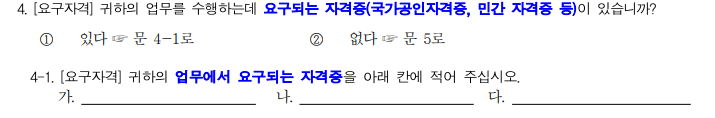

In [35]:
Image('./image/2018bq4_1.PNG')

없는 사람이 입력을 안 했을 것이므로 없음으로 대체하겠다.

In [36]:
print(sum(know_2018['bq4'].isnull()))

16


In [37]:
know_2018.loc[(know_2018['bq4'].isnull()), 'bq4_1a']

1253    NaN
1628    NaN
2938    NaN
3505    NaN
4478    NaN
4718    NaN
4884    NaN
5292    NaN
5433    NaN
6512    NaN
7480    NaN
7815    NaN
7920    NaN
8171    NaN
8760    NaN
8987    NaN
Name: bq4_1a, dtype: object

In [38]:
know_2018.loc[(know_2018['bq4'].isnull()), 'bq4']=2

In [39]:
know_2018_test.loc[(know_2018_test['bq4'].isnull()), 'bq4_1a']

86      NaN
87      NaN
663     NaN
1171    NaN
1423    NaN
2050    NaN
2761    NaN
3141    NaN
3221    NaN
4756    NaN
4848    NaN
4857    NaN
7867    NaN
8329    NaN
Name: bq4_1a, dtype: object

In [40]:
know_2018_test.loc[(know_2018_test['bq4'].isnull()), 'bq4']=2

In [41]:
know_2018.loc[(know_2018['bq4_1a'].isnull()), 'bq4_1a'] = '없다'
know_2018_test.loc[(know_2018_test['bq4_1a'].isnull()), 'bq4_1a'] = '없다'
know_2018.loc[(know_2018['bq4_1b'].isnull()), 'bq4_1b'] = '없다'
know_2018_test.loc[(know_2018_test['bq4_1b'].isnull()), 'bq4_1b'] = '없다'
know_2018.loc[(know_2018['bq4_1c'].isnull()), 'bq4_1c'] = '없다'
know_2018_test.loc[(know_2018_test['bq4_1c'].isnull()), 'bq4_1c'] = '없다'

In [42]:
print(sum(know_2018['bq4_1a'].isnull()))
print(sum(know_2018['bq4_1b'].isnull()))
print(sum(know_2018['bq4_1c'].isnull()))
print(sum(know_2018_test['bq4_1a'].isnull()))
print(sum(know_2018_test['bq4_1b'].isnull()))
print(sum(know_2018_test['bq4_1c'].isnull()))

0
0
0
0
0
0


### bq5

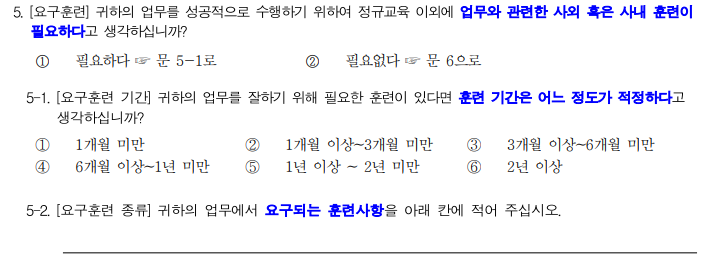

In [43]:
Image('./image/2018bq5.PNG')

필요없다고 생각한 사람들이 결측치로 남겨놨을 확률이 높으므로 5-1의 경우에는 0으로, 5-2는 없음으로 한다.

In [44]:
print(sum(know_2018['bq5'].isnull()))

10


In [45]:
know_2018.loc[(know_2018['bq5'].isnull()), 'bq5_1']

1548    NaN
1628    NaN
3505    NaN
4254    NaN
4718    NaN
4884    NaN
5292    NaN
5433    NaN
7992    NaN
8987    NaN
Name: bq5_1, dtype: object

In [46]:
know_2018.loc[(know_2018['bq5'].isnull()), 'bq5']=2

In [47]:
know_2018_test.loc[(know_2018_test['bq5'].isnull()), 'bq5_1']

86      NaN
2050    NaN
2761    NaN
3141    NaN
3311    NaN
4492    NaN
4848    NaN
8329    NaN
8651    NaN
Name: bq5_1, dtype: object

In [48]:
know_2018_test.loc[(know_2018_test['bq5'].isnull()), 'bq5']=2

In [49]:
know_2018.loc[(know_2018['bq5_1'].isnull()), 'bq5_1'] = 0
know_2018_test.loc[(know_2018_test['bq5_1'].isnull()), 'bq5_1'] = 0
know_2018.loc[(know_2018['bq5_2'].isnull()), 'bq5_2'] = '없음'
know_2018_test.loc[(know_2018_test['bq5_2'].isnull()), 'bq5_2'] = '없음'

print(sum(know_2018['bq5_1'].isnull()))
print(sum(know_2018['bq5_2'].isnull()))
print(sum(know_2018_test['bq5_1'].isnull()))
print(sum(know_2018_test['bq5_2'].isnull()))

0
0
0
0


### bq12

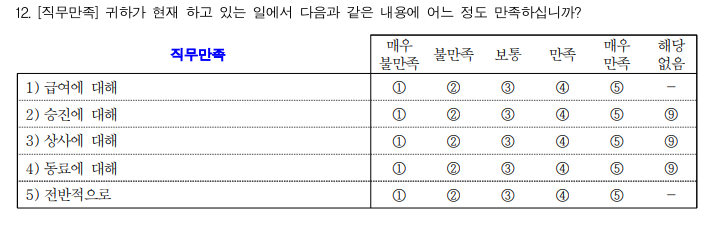

In [50]:
Image('./image/2018bq12.PNG')

12_1 12_2, 12_3, 12_4에 결측치가 존재한다.

급여는 7번 문항 교육수준,

승진 같은 경우에는 10번 문항의 발전가능성을 토대로,

상사 동료 같은 경우에는 11번 근무조건을 토대로 대체하겠다.

#### bq12_1

In [51]:
know_2018.loc[know_2018['bq12_1'].isnull(),'bq7'].describe()

count    1.0
mean     3.0
std      NaN
min      3.0
25%      3.0
50%      3.0
75%      3.0
max      3.0
Name: bq7, dtype: float64

In [52]:
know_2018.loc[know_2018['bq12_1'].isnull(),'bq12_1']=3
know_2018_test.loc[know_2018_test['bq12_1'].isnull(),'bq12_1']=3

print(sum(know_2018['bq12_1'].isnull()))
print(sum(know_2018_test['bq12_1'].isnull()))

0
0


#### bq12_2

In [53]:
know_2018.loc[know_2018['bq12_2'].isnull(),'bq10'].describe()

count    1174.000000
mean        3.824532
std         0.827827
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: bq10, dtype: float64

In [54]:
know_2018.loc[know_2018['bq12_2'].isnull(),'bq12_2']=3.82
know_2018_test.loc[know_2018_test['bq12_2'].isnull(),'bq12_2']=3.82

print(sum(know_2018['bq12_2'].isnull()))
print(sum(know_2018_test['bq12_2'].isnull()))

0
0


#### bq12_3, bq12_4

In [55]:
know_2018.loc[know_2018['bq12_3'].isnull(),'bq11'].describe()

count    1008.000000
mean        3.102183
std         1.003705
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: bq11, dtype: float64

In [56]:
know_2018.loc[know_2018['bq12_3'].isnull(),'bq12_3']=3.1
know_2018_test.loc[know_2018_test['bq12_3'].isnull(),'bq12_3']=3.1

print(sum(know_2018['bq12_3'].isnull()))
print(sum(know_2018_test['bq12_3'].isnull()))

0
0


#### bq12_4

In [57]:
know_2018.loc[know_2018['bq12_4'].isnull(),'bq11'].describe()

count    750.000000
mean       2.960000
std        1.006521
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: bq11, dtype: float64

In [58]:
know_2018.loc[know_2018['bq12_4'].isnull(),'bq12_4']=2.96
know_2018_test.loc[know_2018_test['bq12_4'].isnull(),'bq12_4']=2.96

print(sum(know_2018['bq12_4'].isnull()))
print(sum(know_2018_test['bq12_4'].isnull()))

0
0


### bq21

21. [기본급, 고정급 비중] 귀하가 사업주/고객에게서 한 달에 받는 보수 중 고정급(기본급, 고정 수당, 고정
상여 등)이 어느 정도 비중을 차지합니까?
* 고정급여가 정해져 있지 않은 경우 '0'으로 기재해주시기 바랍니다.
전체 한달 보수 중 _____________%

bq7 교육 수준을 이용해 대체하겠다

In [59]:
print(sum(know_2018['bq21'].isnull()))
print(sum(know_2018_test['bq21'].isnull()))

1
0


In [60]:
know_2018.loc[know_2018['bq21'].isnull(),'bq7']

3064    3.0
Name: bq7, dtype: float64

In [61]:
know_2018.loc[know_2018['bq7']==3,'bq21'].describe()

count    762.000000
mean      74.818898
std       36.444096
min        0.000000
25%       70.000000
50%       90.000000
75%      100.000000
max      100.000000
Name: bq21, dtype: float64

In [62]:
know_2018.loc[know_2018['bq21'].isnull(),'bq21']=90

In [63]:
print(sum(know_2018['bq21'].isnull()))
print(sum(know_2018_test['bq21'].isnull()))

0
0


In [64]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2018.isnull().sum().index, know_2018.isnull().sum(), know_2018_test.isnull().sum().index, know_2018_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq221', 'bq222', 'bq223', 'bq231', 'bq234', 'bq235', 'bq241', 'bq242', 'bq243', 'bq244', 'bq245', 'bq25', 'bq25_1', 'bq26_1', 'bq26_1a', 'bq26_2', 'bq26_2a', 'bq26_3', 'bq26_3a', 'bq26_4', 'bq26_4a', 'bq28_1', 'bq29', 'bq30', 'bq31', 'bq32', 'bq33', 'bq36', 'bq37_1', 'bq38', 'bq38_1', 'bq38_2', 'bq39', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']
['bq221', 'bq222', 'bq223', 'bq231', 'bq234', 'bq235', 'bq241', 'bq242', 'bq243', 'bq244', 'bq245', 'bq25', 'bq25_1', 'bq26_1', 'bq26_1a', 'bq26_2a', 'bq26_3', 'bq26_3a', 'bq26_4', 'bq26_4a', 'bq28_1', 'bq29', 'bq30', 'bq31', 'bq32', 'bq33', 'bq37', 'bq37_1', 'bq38', 'bq38_1', 'bq38_2', 'bq39', 'bq41_1', 'bq41_2', 'bq41_3']


### bq221, bq222, bq223

22. [계약 유형] 귀하는 사업주/고객에게서 받는 보수에 대해 어떤 형태의 세금을 납부하고 계십니까?
* 2가지 이상 해당할 경우, 모두 말씀해주시기 바랍니다.
① 근로소득세 ② 사업소득세 ③ 잘 모름

결측치는 0으로 대체하겠다.

In [65]:
print(know_2018['bq221'])

0       1.0
1       1.0
2       NaN
3       1.0
4       1.0
       ... 
9067    NaN
9068    NaN
9069    NaN
9070    NaN
9071    1.0
Name: bq221, Length: 9072, dtype: float64


In [66]:
for col in ['bq221','bq222','bq223']:
  know_2018.loc[know_2018[col].isnull(),col]=0
  know_2018_test.loc[know_2018_test[col].isnull(),col]=0
  print(sum(know_2018[col].isnull()))
  print(sum(know_2018_test[col].isnull()))

0
0
0
0
0
0


### bq231, bq234, bq235

23. [계약 유형] 귀하의 일자리에서 귀하가 맺은 계약은 다음 중 어디에 해당됩니까?
* 2가지 이상 해당할 경우, 모두 말씀해주시기 바랍니다
① 근로계약 ② 위임(위탁, 위촉) 계약 ③ 도급계약
④ 잘 모름 ⑤ 해당없음

결측치는 0으로 대체하겠다.

In [67]:
for col in ['bq231','bq234','bq235']:
  know_2018.loc[know_2018[col].isnull(),col]=0
  know_2018_test.loc[know_2018_test[col].isnull(),col]=0
  print(sum(know_2018[col].isnull()))
  print(sum(know_2018_test[col].isnull()))

0
0
0
0
0
0


### bq241, bq242, bq243, bq244, bq245

24. [계약 기간] 귀하가 일자리에서 맺은 계약기간은 어떻게 정해져 있습니까?
* 2가지 이상 해당할 경우, 모두 말씀해주시기 바랍니다.
① 기간이 정해져 있지 않음 ② 연간(1~3년)단위로 ③ 개월 단위로
④ 물량/과업/프로젝트단위로 ⑤ 잘 모름/해당없음

In [68]:
for col in ['bq241','bq242','bq243','bq244','bq245']:
  know_2018.loc[know_2018[col].isnull(),col]=0
  know_2018_test.loc[know_2018_test[col].isnull(),col]=0
  print(sum(know_2018[col].isnull()))
  print(sum(know_2018_test[col].isnull()))

0
0
0
0
0
0
0
0
0
0


In [69]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2018.isnull().sum().index, know_2018.isnull().sum(), know_2018_test.isnull().sum().index, know_2018_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq25', 'bq25_1', 'bq26_1', 'bq26_1a', 'bq26_2', 'bq26_2a', 'bq26_3', 'bq26_3a', 'bq26_4', 'bq26_4a', 'bq28_1', 'bq29', 'bq30', 'bq31', 'bq32', 'bq33', 'bq36', 'bq37_1', 'bq38', 'bq38_1', 'bq38_2', 'bq39', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']
['bq25', 'bq25_1', 'bq26_1', 'bq26_1a', 'bq26_2a', 'bq26_3', 'bq26_3a', 'bq26_4', 'bq26_4a', 'bq28_1', 'bq29', 'bq30', 'bq31', 'bq32', 'bq33', 'bq37', 'bq37_1', 'bq38', 'bq38_1', 'bq38_2', 'bq39', 'bq41_1', 'bq41_2', 'bq41_3']


### bq 25

25. [전속성1] 귀하는 현재 몇 개의 업체와 근로/위임/도급 계약이 되어 있습니까?
① 1개 ☞ 문 25-1로 ② 2개 ☞ 문 26으로 ③ 3개 이상 ☞ 문 26으로

25-1. [전속성2] 귀하는 현재 일하는 사업체 외에 다른 사업체와 근로/위임/도급 계약이 가능합니까?
① 예 ② 아니오

In [70]:
print(sum(know_2018['bq25'].isnull()))
print(sum(know_2018_test['bq25'].isnull()))

3
1


In [71]:
know_2018.loc[know_2018['bq25'].isnull(),'bq25_1']

3064    1.0
4478    1.0
4884    1.0
Name: bq25_1, dtype: float64

In [72]:
know_2018_test.loc[know_2018_test['bq25'].isnull(),'bq25_1']

3221    1.0
Name: bq25_1, dtype: float64

In [73]:
know_2018.loc[know_2018['bq25'].isnull(),'bq25']=1
know_2018_test.loc[know_2018_test['bq25'].isnull(),'bq25']=1

In [74]:
print(sum(know_2018['bq25'].isnull()))
print(sum(know_2018_test['bq25'].isnull()))

0
0


In [75]:
know_2018.loc[know_2018['bq25_1'].isnull(),'bq25_1']=0
know_2018_test.loc[know_2018_test['bq25_1'].isnull(),'bq25_1']=0

print(sum(know_2018['bq25_1'].isnull()))
print(sum(know_2018_test['bq25_1'].isnull()))

0
0


### bq26

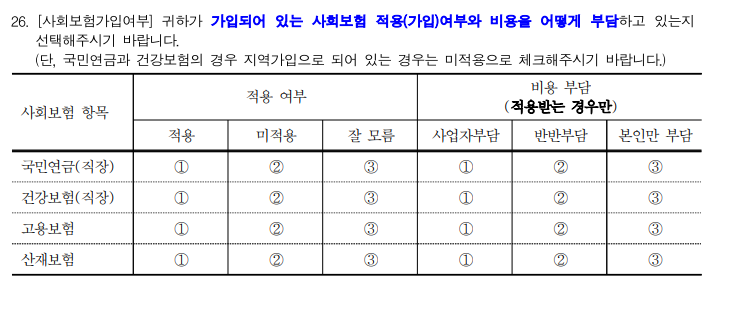

In [76]:
Image('./image/2018bq26.PNG')

가입되어 있지 않은 사람들이 결측치를 만들었을 것이라고 판단하여 0으로 하겠다.

In [77]:
for col in ['bq26_1', 'bq26_1a', 'bq26_2', 'bq26_2a', 'bq26_3', 'bq26_3a','bq26_4', 'bq26_4a']:
  know_2018.loc[know_2018[col].isnull(),col]=0
  know_2018_test.loc[know_2018_test[col].isnull(),col]=0
  print(sum(know_2018[col].isnull()))
  print(sum(know_2018_test[col].isnull()))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [78]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2018.isnull().sum().index, know_2018.isnull().sum(), know_2018_test.isnull().sum().index, know_2018_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq28_1', 'bq29', 'bq30', 'bq31', 'bq32', 'bq33', 'bq36', 'bq37_1', 'bq38', 'bq38_1', 'bq38_2', 'bq39', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']
['bq28_1', 'bq29', 'bq30', 'bq31', 'bq32', 'bq33', 'bq37', 'bq37_1', 'bq38', 'bq38_1', 'bq38_2', 'bq39', 'bq41_1', 'bq41_2', 'bq41_3']


### bq28_1 ~ bq 33

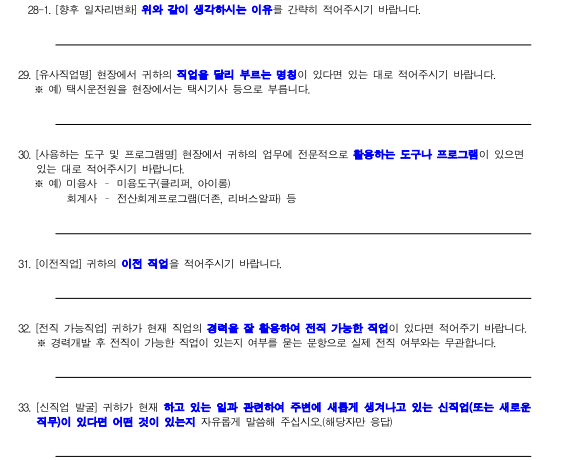

In [79]:
Image('./image/2018bq28_1.PNG')

In [80]:
know_2018 = know_2018.drop(columns = ['bq28_1'])
know_2018_test = know_2018_test.drop(columns = ['bq28_1'])
know_2018.loc[know_2018['bq29'].isnull(),'bq29']='없음'
know_2018_test.loc[know_2018_test['bq29'].isnull(),'bq29']='없음'
know_2018 = know_2018.drop(columns = [ 'bq30'])
know_2018_test = know_2018_test.drop(columns = [ 'bq30'])
for col in ['bq31','bq32','bq33']:
  know_2018.loc[know_2018[col].isnull(),col]='없음'
  know_2018_test.loc[know_2018_test[col].isnull(),col]='없음'
  print(sum(know_2018[col].isnull()))
  print(sum(know_2018_test[col].isnull()))

0
0
0
0
0
0


In [81]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2018.isnull().sum().index, know_2018.isnull().sum(), know_2018_test.isnull().sum().index, know_2018_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq36', 'bq37_1', 'bq38', 'bq38_1', 'bq38_2', 'bq39', 'bq40', 'bq41_1', 'bq41_2', 'bq41_3']
['bq37', 'bq37_1', 'bq38', 'bq38_1', 'bq38_2', 'bq39', 'bq41_1', 'bq41_2', 'bq41_3']


### bq 36

36. [연령] 귀하의 나이는 만 몇 세입니까?
만 세

In [82]:
know_2018.loc[know_2018['bq36'].isnull(),]

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,cq10,cq11,cq12,cq13,cq14,cq15,cq16,cq17,cq18,cq19,cq20,cq21,cq22,cq23,cq24,cq25,cq26,cq27,cq28,cq29,cq30,cq31,cq32,cq33,cq34,cq35,cq36,cq37,cq38,cq39,...,bq231,bq232,bq233,bq234,bq235,bq241,bq242,bq243,bq244,bq245,bq25,bq25_1,bq26_1,bq26_1a,bq26_2,bq26_2a,bq26_3,bq26_3a,bq26_4,bq26_4a,bq27,bq28,bq29,bq31,bq32,bq33,bq34,bq35,bq36,bq37,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode
8205,17700,1,1,5,1,5,3,3,3,3,1,1,1,1,1,5,5,1,4.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,4.0,1.0,5.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1,크레인달면 크레인되는것이고 스카이장비달면 스카이차 되는것입니다 ..이일은 기존에 ...,1,33,3,자동차과,2,NaN,6,NaN,40.0,NaN,NaN,3600.0,NaN,NaN,NaN,NaN,622304


In [83]:
know_2018 = know_2018.drop(columns = ['bq36'])
know_2018_test = know_2018_test.drop(columns = ['bq36'])

### bq37

37. [최종학력] 귀하의 최종학력은 무엇입니까?
① 중학교 졸업 이하 ☞ 문 38로 ② 고등학교 졸업 ☞ 문 37-1로
③ 2~3년제 대학교 졸업 ☞ 문 37-1로 ④ 대학교 졸업 ☞ 문 37-1로
⑤ 대학원 석사 졸업 ☞ 문 37-1로 ⑥ 대학원 박사 졸업 ☞ 문 37-1로

37-1. [전공] 귀하의 최종학력의 학과를 기입해 주십시오. 과
※ 최종학력이 실업계(전문계/특성화고/마이스터고) 고등학교인 경우에도 기재

In [84]:
print(sum(know_2018_test['bq37'].isnull()))

3


In [85]:
know_2018_test.loc[know_2018_test['bq37'].isnull(),'bq37_1']

3982    6
4857    1
6130    1
Name: bq37_1, dtype: object

In [86]:
know_2018_test.loc[6130,['bq37','bq37_1']]

bq37      NaN
bq37_1      1
Name: 6130, dtype: object

In [87]:
know_2018_test.loc[6130,['bq37']]=1
know_2018_test.loc[6130,['bq37_1']]='없음'
know_2018_test.loc[4857,['bq37']]=1
know_2018_test.loc[4857,['bq37_1']]='없음'

In [88]:
know_2018_test.loc[3982,['bq37','bq37_1']]

bq37      NaN
bq37_1      6
Name: 3982, dtype: object

In [89]:
know_2018_test.loc[3982,['bq37']]=6
know_2018_test.loc[3982,['bq37_1']]='모름'

In [90]:
print(sum(know_2018['bq37_1'].isnull()))
print(sum(know_2018_test['bq37_1'].isnull()))

485
426


In [91]:
know_2018.loc[know_2018['bq37_1'].isnull(),'bq37']

15      1
23      1
66      1
72      1
78      1
       ..
8967    1
8969    1
9014    1
9061    1
9064    2
Name: bq37, Length: 485, dtype: object

In [92]:
know_2018.loc[(know_2018['bq37_1'].isnull())&(know_2018['bq37']==1),'bq37_1']='없음'
know_2018_test.loc[(know_2018_test['bq37_1'].isnull())&(know_2018_test['bq37']==1),'bq37_1']='없음'
know_2018.loc[(know_2018['bq37_1'].isnull())&(know_2018['bq37']!=1),'bq37_1']='모름'
know_2018_test.loc[(know_2018_test['bq37_1'].isnull())&(know_2018_test['bq37']!=1),'bq37_1']='모름'

In [93]:
print(sum(know_2018['bq37_1'].isnull()))
print(sum(know_2018_test['bq37_1'].isnull()))

0
0


### bq 38

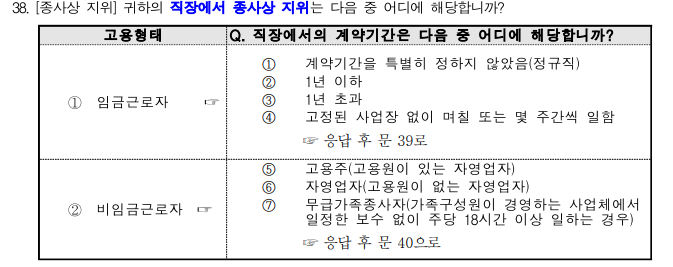

In [94]:
Image('./image/2018bq38.PNG')

결측치 모두 0으로 대체하겠다.

In [95]:
for col in ['bq38', 'bq38_1', 'bq38_2']:
  know_2018.loc[know_2018[col].isnull(),col]=0
  know_2018_test.loc[know_2018_test[col].isnull(),col]=0
  print(sum(know_2018[col].isnull()))
  print(sum(know_2018_test[col].isnull()))

0
0
0
0
0
0


### bq 39

39. [계약형태] 귀하의 직장에서 고용형태는 다음 중 어디에 해당합니까?
① 정규직 ② 비정규직

In [96]:
# 결측치 0으로 대체하겠다.
know_2018.loc[know_2018['bq39'].isnull(),'bq39']=0
know_2018_test.loc[know_2018_test['bq39'].isnull(),'bq39']=0

print(sum(know_2018['bq39'].isnull()))
print(sum(know_2018_test['bq39'].isnull()))

0
0


### bq40

40. [주당 근로시간] 귀하는 보통 일주일에 몇 시간을 일하십니까? 


bq 39와 연관해서 풀겠다.

In [97]:
know_2018.loc[know_2018['bq40'].isnull(),'bq39']

2590       1.0
3064      40.0
8205    3600.0
Name: bq39, dtype: float64

3062, 8205 같은 경우에는 bq40에 넣어야 할 답을 39에 넣은 것을 보인다.

또한 3600은 3600분으로 해석하여 60시간이라 넣겠다.

그리고 둘 다 정규직으로 판단하겠다

In [98]:
know_2018.loc[3064,'bq39']=1
know_2018.loc[8205,'bq39']=1
know_2018.loc[3064,'bq40']=40
know_2018.loc[8205,'bq40']=60

In [99]:
know_2018.loc[know_2018['bq39']==1,'bq40'].astype(float).describe()

count    6624.000000
mean       45.393871
std         7.367240
min         8.000000
25%        40.000000
50%        44.000000
75%        50.000000
max        90.000000
Name: bq40, dtype: float64

In [100]:
know_2018.loc[2590,'bq40']=44

In [101]:
print(sum(know_2018['bq40'].isnull()))
print(sum(know_2018_test['bq40'].isnull()))

0
0


### bq41

In [102]:
know_2018 = know_2018.drop(columns = ['bq41_1', 'bq41_2', 'bq41_3'])
know_2018_test = know_2018_test.drop(columns = ['bq41_1', 'bq41_2', 'bq41_3'])

In [103]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2018.isnull().sum().index, know_2018.isnull().sum(), know_2018_test.isnull().sum().index, know_2018_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

[]
[]


### object들 labelencoder로 처리

In [104]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
for col in know_2018.columns:
  if col == 'ID':
    continue
        
  try:
    know_2018[col] = know_2018[col].map(int)
  except:
    encoder = LabelEncoder()
    know_2018[col] = know_2018[col].map(str)
    know_2018[col] = encoder.fit_transform(know_2018[col])
    encoders[col] = encoder

In [105]:
for col in know_2018_test.columns:
  if col == 'ID':
    continue     
  try:
    know_2018_test[col] = know_2018_test[col].map(int)
  except:
    encoder = encoders[col]
    know_2018_test[col] = know_2018_test[col].map(str)
    category_map = {category: idx for idx, category in enumerate(encoder.classes_)}
    know_2018_test[col] = know_2018_test[col].apply(lambda x: category_map[x] if x in category_map else -1) # train set에서 보지못한 카테고리변수 -1(UNK) 처리        

## 3.3 feature, label 구분

In [106]:
X_train=know_2018.drop(['idx','knowcode'],axis=1)
y_train=know_2018['knowcode']

In [107]:
X_test=know_2018_test.drop(['idx'],axis=1)

# 4. 모델링

In [108]:
!pip install catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [109]:
model=CatBoostClassifier(iterations=2000,random_state=123)

model.fit(X_train,y_train)

Learning rate set to 0.049294
0:	learn: 6.3279980	total: 12s	remaining: 6h 38m 31s
1:	learn: 6.2821546	total: 24s	remaining: 6h 39m 22s
2:	learn: 6.2554915	total: 35.6s	remaining: 6h 34m 42s
3:	learn: 6.2296365	total: 47.1s	remaining: 6h 31m 41s
4:	learn: 6.1961638	total: 58.8s	remaining: 6h 31m 10s
5:	learn: 6.1622488	total: 1m 10s	remaining: 6h 32m 22s
6:	learn: 6.1409501	total: 1m 22s	remaining: 6h 29m 51s
7:	learn: 6.1166496	total: 1m 33s	remaining: 6h 28m 38s
8:	learn: 6.0657745	total: 1m 45s	remaining: 6h 29m 10s
9:	learn: 6.0183281	total: 1m 57s	remaining: 6h 29m 8s
10:	learn: 5.9742576	total: 2m 9s	remaining: 6h 29m 2s
11:	learn: 5.9475970	total: 2m 21s	remaining: 6h 29m 19s
12:	learn: 5.9240545	total: 2m 32s	remaining: 6h 29m 31s
13:	learn: 5.8858513	total: 2m 44s	remaining: 6h 28m 52s
14:	learn: 5.8426869	total: 2m 56s	remaining: 6h 29m 9s
15:	learn: 5.8079506	total: 3m 8s	remaining: 6h 29m 2s
16:	learn: 5.7708626	total: 3m 19s	remaining: 6h 28m 22s
17:	learn: 5.7494049	total

In [110]:
pred=model.predict(X_test)
pred

array([[904201],
       [215105],
       [411103],
       ...,
       [155306],
       [155401],
       [122103]])

In [111]:
pd.DataFrame(pred).to_csv('2018.csv',index=False)

In [112]:
# sub=pd.read_csv('2017.csv')
# sub

In [113]:
# pd.DataFrame(np.concatenate([sub,pd.DataFrame(pred)])).to_csv('2018.csv',index=False)